# Pandas
Data manipulation with Pandas <br>
참고자료: [Chpater 3. Data Manipulation with Pandas, *Python Data Science Handbook*](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html)<br>
치팅시트: [Pandas Cheatsheet](http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)


1. [The Basics](#1.-The-Basics)<br>
    1.1 [Pandas Series](#1.1-Pandas-Series)<br>
    1.2 [Pandas DataFrame](#1.1-Pandas-DataFrame)<br>
    1.3 [Getting Data In/Out](#1.3-Getting-Data-In/Out)<br>
2. [Basic Operations](#2.-Basic-Operations)<br>
    2.1 [Data Indexing and Selection](#2.1-Data-Indexing-and-Selection)<br>
    2.2 [Operations](#2.2-Operations)<br>
    2.3 [Missing Data](#2.3-Missing-Data)<br>
    2.4 [Hierarchical Indexing](#2.4-Hierarchical-Indexing)<br>
    2.5 [Categoricals](#2.5-Categoricals)<br>
    2.6 [Aggregation and Grouping](#2.6-Aggregation-and-Grouping)<br>
    2.7 [Time Series and Plotting](#2.7-Time-Series-and-Plotting)<br>
3. [Dataset Manipulation](#3.-Dataset-Manipulation) <br>
    3.1 [Combining Datasets](#3.1-Combining-Datasets)<br>
    3.2 [Pivot Tables](#3.2-Pivot-Tables)<br>
    3.3 [long table, wide table](#3.3-long-table,-wide-table)

---

## 1. The Basics

### 1.1 Pandas Series

At the very basic level, Pandas objects can be thought of as **enhanced versions of NumPy** structured arrays in which the rows and columns are identified **with labels** rather than simple integer indices.

* **`Series`**: `pd.Series(data=None,index=None,dtype=None,...)`
    - `data.values`: array value 반환
    - `data.index` : index 반환
    - `data = `와 `index = `를 합쳐서 **`dictionary`** 로 `pd.Series`만들 수 있다

In [1]:
import pandas as pd
pd.__version__

'1.0.1'

In [2]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [3]:
# The Series object is basically interchangeable with a one-dimensional NumPy array:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
print(data)

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64


In [4]:
print(data.values)
print(data.index)

[0.25 0.5  0.75 1.  ]
Index(['a', 'b', 'c', 'd'], dtype='object')


In [5]:
# Series as specialized dictionary
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [6]:
population['Texas']

26448193

### 1.2 Pandas DataFrame

* **`DataFrame`**: `pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)`
    - `data=` 와 `columns=`를 합쳐서 **`dictionary`** form으로 `pd.DataFrame`만들 수 있다
    - `df.head()`, `df.tail()`, `df.columns`, `df.index`, `df.values`, `df.describe()` : DataFrame 살펴보기
    - **Add column E** : `df['E'] = pd.Series(np.arange(6),index=df.index)`
    - cf. `pd.date_range('20190101', periods=6, freq='D')` : 2019-01-01부터 시작하는 6개의 날을 생성하겠다


In [3]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [6]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [7]:
print(states.columns, "\n")

print(states['area'])

Index(['population', 'area'], dtype='object') 

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64


In [10]:
# Constructing DataFrame objects:
import numpy as np
data = pd.DataFrame(np.random.rand(5,2),  #Random values in a given shape.
                    columns=['colA','colB'],
                    index=[1,2,3,4,5])
data

,colA,colB
1,0.150549,0.278203
2,0.605013,0.102856
3,0.311396,0.405001
4,0.720321,0.974520
5,0.145396,0.848022


In [11]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
dates = pd.date_range('20190101', periods=6, freq='D')
dates

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2019-01-01,0.393337,0.189602,0.319923,2.643076
2019-01-02,-0.675510,-1.008091,1.126024,-1.134150
2019-01-03,-2.279425,0.938188,-0.248389,-0.561731
2019-01-04,-0.770274,-0.206181,0.261334,1.133988
2019-01-05,1.306699,0.151692,1.682443,-0.706915
2019-01-06,-3.585249,0.692278,0.792287,-0.141272


In [13]:
# Here is how to view the top and bottom rows of the frame:
df.head(3)
#df.tail(3)

,A,B,C,D
2019-01-01,0.393337,0.189602,0.319923,2.643076
2019-01-02,-0.675510,-1.008091,1.126024,-1.134150
2019-01-03,-2.279425,0.938188,-0.248389,-0.561731


In [14]:
print(df.index)
print(df.columns)

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06'],
              dtype='datetime64[ns]', freq='D')
Index(['A', 'B', 'C', 'D'], dtype='object')


In [15]:
# Add columne E 
df['E'] = pd.Series(np.arange(6),index=df.index)
df

,A,B,C,D,E
2019-01-01,0.393337,0.189602,0.319923,2.643076,0
2019-01-02,-0.675510,-1.008091,1.126024,-1.134150,1
2019-01-03,-2.279425,0.938188,-0.248389,-0.561731,2
2019-01-04,-0.770274,-0.206181,0.261334,1.133988,3
2019-01-05,1.306699,0.151692,1.682443,-0.706915,4
2019-01-06,-3.585249,0.692278,0.792287,-0.141272,5


In [16]:
df.values

array([[ 0.39333684,  0.18960187,  0.3199233 ,  2.64307562,  0.        ],
       [-0.67551008, -1.00809092,  1.1260238 , -1.13415023,  1.        ],
       [-2.27942493,  0.93818772, -0.24838856, -0.56173118,  2.        ],
       [-0.77027357, -0.20618135,  0.26133412,  1.13398835,  3.        ],
       [ 1.30669931,  0.15169238,  1.68244282, -0.7069151 ,  4.        ],
       [-3.58524867,  0.69227788,  0.79228706, -0.1412721 ,  5.        ]])

In [17]:
# describe() shows a quick statistic summary of your data:
df.describe()

,A,B,C,D,E
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,-0.935070,0.126248,0.655604,0.205499,2.500000
std,1.772877,0.690149,0.689885,1.424073,1.870829
min,-3.585249,-1.008091,-0.248389,-1.134150,0.000000
25%,-1.902137,-0.116713,0.275981,-0.670619,1.250000
50%,-0.722892,0.170647,0.556105,-0.351502,2.500000
75%,0.126125,0.566609,1.042590,0.815173,3.750000
max,1.306699,0.938188,1.682443,2.643076,5.000000


### 1.3 Getting Data In/Out

1. write data

    - 엑셀파일 : `.to_excel(path,sheet_name='data')`
    - csv 파일 : `.to_csv(path)`
    
    
    
    
2. read data <br>
    `pd.read_excel(path,sheet_name='data', index_col=0, header=0)`
    
    - `index_col=` : **0**은 첫 열을 인덱스로 하겠다/**None**은 인덱스 없다
    - `header=` : **0**은 첫 행을 column name으로 하겠다/**None**은 header 없다.
    - 마찬가지로 `.read_csv( )` 사용가능
    
    
    
    
3. 행이름(인덱스)와 열이름 제거하기
    
    - 인덱스 삭제 : `.reset_index(drop=True)`
    - 열이름 삭제 : `.T.reset_index(drop=True).T`
    - 값만 보기 : `.values`
   
   

In [117]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [118]:
!pwd

/content


In [119]:
%cd /content/drive/My Drive/Data

/content/drive/My Drive/Data


In [46]:
dates = pd.date_range('20190101', periods=6)
data = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
data

,A,B,C,D
2019-01-01,0.100993,0.403549,-1.681866,-0.938574
2019-01-02,0.936760,-0.714129,0.571850,1.267326
2019-01-03,-1.192585,0.694835,-1.932788,1.934869
2019-01-04,0.131231,1.270200,0.183235,0.574098
2019-01-05,-0.250669,-0.508907,0.595792,0.527211
2019-01-06,-0.540293,-1.666321,0.275150,1.674158


In [47]:
# Writing your csv file:
data.to_csv("foo.csv")

In [48]:
# Reading from a csv file in my drive:
data2 = pd.read_csv("foo.csv",index_col=0)
data2

,A,B,C,D
2019-01-01,0.100993,0.403549,-1.681866,-0.938574
2019-01-02,0.936760,-0.714129,0.571850,1.267326
2019-01-03,-1.192585,0.694835,-1.932788,1.934869
2019-01-04,0.131231,1.270200,0.183235,0.574098
2019-01-05,-0.250669,-0.508907,0.595792,0.527211
2019-01-06,-0.540293,-1.666321,0.275150,1.674158


In [51]:
# Wring to an excel file:
data.to_excel("foo.xlsx",sheet_name='Sheet1')

In [54]:
# Reading from an excel file:
data3 = pd.read_excel('foo.xlsx','Sheet1',index_col=0)
data3

,A,B,C,D
2019-01-01,0.100993,0.403549,-1.681866,-0.938574
2019-01-02,0.936760,-0.714129,0.571850,1.267326
2019-01-03,-1.192585,0.694835,-1.932788,1.934869
2019-01-04,0.131231,1.270200,0.183235,0.574098
2019-01-05,-0.250669,-0.508907,0.595792,0.527211
2019-01-06,-0.540293,-1.666321,0.275150,1.674158


---

## 2. Basic Operations
### 2.1 Data Indexing and Selection

* **Selection**: 이 방법으로는 **행, 열 모두** 선택하는 건 불가능하다. 
    - `df['A']` : Selecting **a single column**, which yields a Series, equivalent to `df.A`
    - `df[0:2]` : Selecting via `[]`, which **slices the rows**.
    
- **Selection by label(index 및 column이름을 이용):** `.loc[row, column]`
    - `df.loc[:,['A','C']]` : A, C만 뽑고 싶을 때
    - `df.loc[:,'A':'C']` : A부터 C까지 뽑고 싶을 때
* **Selection by position(상대적 위치를 이용):** `iloc[]`
    - e.g. `df.iloc[2:4,0:3]`
    
- **Boolean indexing**
    - expression이 참을 return하는 **row**만 return : `df[(df.A>0) & (df.E<4)]`
    - expression이 참을 return하는 **cell**만 return : `df[df>0]`(참이 아닌 cell은 **NaN**)
    - expression이 참을 return하는 **row**만 return : 
        ```
        ind = df2['F'].isin(['one'])
        df2[ind]
        ```
        - cf. `isin()`: 포함하면 `True` return
        
- **특정 셀 가져오기**
    - `df.at[dates[0],'G'] = -1` : **at**은 row, column 명으로 
    - `df.iat[1,5] = np.nan` : **iat**은 상대적 위치로
        - cf. `np.nan` : NaN 생성

* 특정 colum 가져오기 : `data[   ]`, `data[[  ,  ]]`(여러개도 가능)
* 특정 열에 한한 통계갑 도출 가능 : `data[  ].min()`
* 특정 행 가져오기 : `data.loc[  ]`, `data.iloc[  ]`
* 특정 행과 열을 가져오기 : `data.loc[ , ]`, `data.iloc[ , ]`
* 특정 셀 가져오기 : `data.at[  ,  ]`, `data.iat[  ,  ]`

In [18]:
# Selecting a single column, which yields a Series, equivalent to df.A:
df['A']
# df.A

2019-01-01    0.393337
2019-01-02   -0.675510
2019-01-03   -2.279425
2019-01-04   -0.770274
2019-01-05    1.306699
2019-01-06   -3.585249
Freq: D, Name: A, dtype: float64

In [19]:
# Selecting via [], which slices the rows.
df[0:2]

,A,B,C,D,E
2019-01-01,0.393337,0.189602,0.319923,2.643076,0
2019-01-02,-0.675510,-1.008091,1.126024,-1.134150,1


In [20]:
# For getting a cross section using a label:
df.loc[dates[0]]

A    0.393337
B    0.189602
C    0.319923
D    2.643076
E    0.000000
Name: 2019-01-01 00:00:00, dtype: float64

In [21]:
# For getting a cross section using a label:
df.loc[:,['A','C']]

,A,C
2019-01-01,0.393337,0.319923
2019-01-02,-0.675510,1.126024
2019-01-03,-2.279425,-0.248389
2019-01-04,-0.770274,0.261334
2019-01-05,1.306699,1.682443
2019-01-06,-3.585249,0.792287


In [22]:
df.loc[:,'A':'C']

,A,B,C
2019-01-01,0.393337,0.189602,0.319923
2019-01-02,-0.675510,-1.008091,1.126024
2019-01-03,-2.279425,0.938188,-0.248389
2019-01-04,-0.770274,-0.206181,0.261334
2019-01-05,1.306699,0.151692,1.682443
2019-01-06,-3.585249,0.692278,0.792287


In [23]:
df.loc['20190102':'20190105','A':'C']

,A,B,C
2019-01-02,-0.675510,-1.008091,1.126024
2019-01-03,-2.279425,0.938188,-0.248389
2019-01-04,-0.770274,-0.206181,0.261334
2019-01-05,1.306699,0.151692,1.682443


In [24]:
df.loc[dates[1:4],'A':'C']

,A,B,C
2019-01-02,-0.675510,-1.008091,1.126024
2019-01-03,-2.279425,0.938188,-0.248389
2019-01-04,-0.770274,-0.206181,0.261334


In [25]:
dates

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06'],
              dtype='datetime64[ns]', freq='D')

In [27]:
# Select via the position of the passed integers:
df.iloc[3]

A   -0.770274
B   -0.206181
C    0.261334
D    1.133988
E    3.000000
Name: 2019-01-04 00:00:00, dtype: float64

In [28]:
df.iloc[2:4,0:3]

,A,B,C
2019-01-03,-2.279425,0.938188,-0.248389
2019-01-04,-0.770274,-0.206181,0.261334


In [29]:
df.iloc[2:4,:]

,A,B,C,D,E
2019-01-03,-2.279425,0.938188,-0.248389,-0.561731,2
2019-01-04,-0.770274,-0.206181,0.261334,1.133988,3


In [30]:
df.iloc[:,0:3]

,A,B,C
2019-01-01,0.393337,0.189602,0.319923
2019-01-02,-0.675510,-1.008091,1.126024
2019-01-03,-2.279425,0.938188,-0.248389
2019-01-04,-0.770274,-0.206181,0.261334
2019-01-05,1.306699,0.151692,1.682443
2019-01-06,-3.585249,0.692278,0.792287


In [22]:
#Boolean indexing
df[(df.A>0) & (df.E<4)]

,A,B,C,D,E
2019-01-02,0.291902,0.124607,-0.622321,-1.154632,1
2019-01-03,0.472267,-0.505303,-0.066491,1.229147,2
2019-01-04,1.584309,-0.524077,-2.039237,0.743191,3


In [23]:
df[df>0]
# 참이 아닌 cell은 NaN

,A,B,C,D,E
2019-01-01,NaN,0.878950,NaN,1.158598,NaN
2019-01-02,0.291902,0.124607,NaN,NaN,1.0
2019-01-03,0.472267,NaN,NaN,1.229147,2.0
2019-01-04,1.584309,NaN,NaN,0.743191,3.0
2019-01-05,1.770755,NaN,0.324731,0.678581,4.0
2019-01-06,NaN,1.671757,NaN,0.086469,5.0


In [24]:
# Using the isin() method for filtering:
df2 = df.copy()
df2['F'] = ['one','two','three'] * 2
df2

,A,B,C,D,E,F
2019-01-01,-0.030586,0.878950,-0.245474,1.158598,0,one
2019-01-02,0.291902,0.124607,-0.622321,-1.154632,1,two
2019-01-03,0.472267,-0.505303,-0.066491,1.229147,2,three
2019-01-04,1.584309,-0.524077,-2.039237,0.743191,3,one
2019-01-05,1.770755,-0.709663,0.324731,0.678581,4,two
2019-01-06,-0.401276,1.671757,-2.108728,0.086469,5,three


In [25]:
ind = df2['F'].isin(['one'])
df2[ind]

,A,B,C,D,E,F
2019-01-01,-0.030586,0.878950,-0.245474,1.158598,0,one
2019-01-04,1.584309,-0.524077,-2.039237,0.743191,3,one


In [26]:
# Setting a new column automatically aligns the data by the indexes.
df['G'] = np.array([1,2,3,4,5,6],dtype=float)
df

,A,B,C,D,E,G
2019-01-01,-0.030586,0.878950,-0.245474,1.158598,0,1.0
2019-01-02,0.291902,0.124607,-0.622321,-1.154632,1,2.0
2019-01-03,0.472267,-0.505303,-0.066491,1.229147,2,3.0
2019-01-04,1.584309,-0.524077,-2.039237,0.743191,3,4.0
2019-01-05,1.770755,-0.709663,0.324731,0.678581,4,5.0
2019-01-06,-0.401276,1.671757,-2.108728,0.086469,5,6.0


In [27]:
# Setting values by label:
df.at[dates[0],'G'] = -1
df

,A,B,C,D,E,G
2019-01-01,-0.030586,0.878950,-0.245474,1.158598,0,-1.0
2019-01-02,0.291902,0.124607,-0.622321,-1.154632,1,2.0
2019-01-03,0.472267,-0.505303,-0.066491,1.229147,2,3.0
2019-01-04,1.584309,-0.524077,-2.039237,0.743191,3,4.0
2019-01-05,1.770755,-0.709663,0.324731,0.678581,4,5.0
2019-01-06,-0.401276,1.671757,-2.108728,0.086469,5,6.0


In [28]:
# Setting values by position:
df.iat[1,5] = np.nan
df

,A,B,C,D,E,G
2019-01-01,-0.030586,0.878950,-0.245474,1.158598,0,-1.0
2019-01-02,0.291902,0.124607,-0.622321,-1.154632,1,NaN
2019-01-03,0.472267,-0.505303,-0.066491,1.229147,2,3.0
2019-01-04,1.584309,-0.524077,-2.039237,0.743191,3,4.0
2019-01-05,1.770755,-0.709663,0.324731,0.678581,4,5.0
2019-01-06,-0.401276,1.671757,-2.108728,0.086469,5,6.0


### 2.2 Operations

- **`.mean()`**
    - 0은 column별, 1은 row 별
    - `df.mean(1)` = **`df.apply(np.mean,axis=1)`**
    
    
* **pandas operation**

| Python Operator | Pandas Method(s)                      |
|-----------------|---------------------------------------|
| ``+``           | ``add()``                             |
| ``-``           | ``sub()``, ``subtract()``             |
| ``*``           | ``mul()``, ``multiply()``             |
| ``/``           | ``truediv()``, ``div()``, ``divide()``|
| ``//``          | ``floordiv()``                        |
| ``%``           | ``mod()``                             |
| ``**``          | ``pow()``                             |

- **.add()** : index맞춰서 더해준다.
    - `A + B` = `A.add(B,level=None)`

In [32]:
# Performing a descriptive statistic:
df.mean()

A   -0.935070
B    0.126248
C    0.655604
D    0.205499
E    2.500000
dtype: float64

In [33]:
# Same operation on the other axis (row=1, column=0):
df.mean(1)

2019-01-01    0.709188
2019-01-02   -0.138345
2019-01-03   -0.030271
2019-01-04    0.683774
2019-01-05    1.286784
2019-01-06    0.551609
Freq: D, dtype: float64

In [25]:
df.apply(np.mean,axis=0)

A    0.381381
B   -0.233968
C    0.134921
D   -0.279058
E    2.500000
dtype: float64

In [0]:
df.apply(np.mean,axis=1)

2019-01-01    24.656332
2019-01-02    13.881689
2019-01-03    25.602768
2019-01-04    25.646333
2019-01-05    26.104444
2019-01-06    26.255633
Freq: D, dtype: float64

---

In [31]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [32]:
A.add(B,fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [33]:
A.add(B,level=None)

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [72]:
# Same operation on the other axis: 
rng = np.random.RandomState(123)
df_a = pd.DataFrame(rng.randint(0, 20, (2, 2)), columns=list('AB'))
df_a

,A,B
0,13,2
1,2,6


In [73]:
df_b = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
df_b

,B,A,C
0,1,3,9
1,6,1,0
2,1,9,0


In [74]:
df_a + df_b

,A,B,C
0,16.0,3.0,NaN
1,3.0,12.0,NaN
2,NaN,NaN,NaN


In [39]:
# Ufuncs: Operations Between DataFrame and Series
A = np.arange(12).reshape(3,4)
print(A)
A - A[0]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([[0, 0, 0, 0],
       [4, 4, 4, 4],
       [8, 8, 8, 8]])

In [40]:
df_b - df_b.iloc[0]

,B,A,C
0,0,0,0
1,5,-2,-9
2,0,6,-9


In [41]:
df_b.subtract(df_b.iloc[0])

,B,A,C
0,0,0,0
1,5,-2,-9
2,0,6,-9


In [42]:
df_b.subtract(df_b['A'],axis=0)

,B,A,C
0,-2,0,6
1,5,0,-1
2,-8,0,-9


### 2.3 Missing Data

- missing value in pandas `np.nan`
    - 에러없이 연산이 가능하게 해준다( 단 결과는 모두 `nan`)
    - data type을 지정할 수 있다.(한 array내에서 모두 같은 데이터타입을 같게 해준다)
    
    
- missing value를 무시하고 계산하는 방법
    - `np.nansum()`
    - `np.nanmin()`
    - `np.nanmax()`
    
    
- **pandas**에서 결측치
    - `None`은 `nan`으로 바뀐다.
    - `nan` 관련 function
        - ``isnull()``: Generate a boolean mask indicating missing values
        - ``notnull()``: Opposite of ``isnull()``
        - ``dropna()``: Return a filtered version of the data
            - **axis** : 'columns(=1)', 'rows(=0)'
            - **how** : 'all' --> 모두 NaN이면 열을 제거
            - **thresh** : 3 --> 3개 이상의 non-missing인 행만 남김
        - ``fillna()``: Return a copy of the data with missing values filled or imputed
            - 특정 숫자로 결측치를 대체하고 싶을 경우 e.g. `N.fillna(0)`
            - **axis=1** : 각 행별로
            - **method**
                - 'bfill' : NaN의 바로 뒤 열값으로 채움(backward)
                - 'ffill' : NaN의 바로 앞 열값으로 채움(forward)

In [52]:
# None: Pythonic missing data
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [44]:
vals1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [45]:
# NaN: Missing numerical data
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

dtype('float64')

In [46]:
1 + np.nan

nan

In [40]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

In [41]:
# NumPy does provide some special aggregations that will ignore these missing values:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

In [42]:
# NaN and None both have their place, and Pandas is built to handle the two of them nearly interchangeably.
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [53]:
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [54]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [55]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [56]:
df.dropna()  # drop rows with nan

,0,1,2
1,2.0,3.0,5


In [57]:
df.dropna(axis=1)  # drop columns with nan

,2
0,2
1,5
2,6


### 2.4 Hierarchical Indexing

- `index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]]`: index를 두개이상 지정할 수 있다.
- multi-index(또는 multi-column만들기) : 
    ```
    index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
    ```
- (wide format을) long format으로 만들기 : `df.stack()`
- (long format을) wide format으로 만들기 : `df.unstack()`

In [47]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.120208  0.935037
  2  0.143203  0.122340
b 1  0.427984  0.488205
  2  0.586582  0.672603

In [55]:
df.stack()  # long-format data 

a  1  data1    0.120208
      data2    0.935037
   2  data1    0.143203
      data2    0.122340
b  1  data1    0.427984
      data2    0.488205
   2  data1    0.586582
      data2    0.672603
dtype: float64

In [56]:
df

data1     data2
a 1  0.120208  0.935037
  2  0.143203  0.122340
b 1  0.427984  0.488205
  2  0.586582  0.672603

In [49]:
df.unstack()  # wide-format data 

data1               data2          
          1         2         1         2
a  0.120208  0.143203  0.935037  0.122340
b  0.427984  0.586582  0.488205  0.672603

In a ``DataFrame``, the rows and columns are completely symmetric, and just as the rows can have multiple levels of indices, the columns can have multiple levels as well.

In [57]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      16.0  37.9  35.0  37.0  42.0  36.7
     2      39.0  37.2  23.0  36.8  34.0  38.0
2014 1      40.0  37.6  20.0  35.9  43.0  35.2
     2      46.0  37.5  60.0  39.0  34.0  37.5

In [71]:
health_data.index

MultiIndex([(2013, 1),
            (2013, 2),
            (2014, 1),
            (2014, 2)],
           names=['year', 'visit'])

In [58]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      35.0  37.0
     2      23.0  36.8
2014 1      20.0  35.9
     2      60.0  39.0

In [59]:
health_data['Guido', 'HR']

year  visit
2013  1        35.0
      2        23.0
2014  1        20.0
      2        60.0
Name: (Guido, HR), dtype: float64

In [60]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      16.0  37.9
     2      39.0  37.2

In [61]:
health_data.loc[:, ['Bob', 'HR']]

subject      Bob      
type          HR  Temp
year visit            
2013 1      16.0  37.9
     2      39.0  37.2
2014 1      40.0  37.6
     2      46.0  37.5

### 2.5 Categoricals

(`r`의 factor(& level)와 유사)
- type casting : `a.astype('category')` => `CategoricalDtype(categories=[1, 2, 3, 4], ordered=False)`
- level 이름 바꾸기 : `df['grade'].cat.categories = ['very good','so so','very bad']`

In [69]:
a = pd.Series([1,2,3,4])
a.dtype

dtype('int64')

In [70]:
a2 = a.astype('category')
a2 + 1

TypeError: Series cannot perform the operation +

In [72]:
a2.dtype

CategoricalDtype(categories=[1, 2, 3, 4], ordered=False)

In [73]:
df = pd.DataFrame({'id':np.arange(1,7),
                   'raw_grade':['A','C','B','C','A','B']})
df

,id,raw_grade
0,1,A
1,2,C
2,3,B
3,4,C
4,5,A
5,6,B


In [74]:
df['grade'] = df['raw_grade'].astype('category')
df['grade']

0    A
1    C
2    B
3    C
4    A
5    B
Name: grade, dtype: category
Categories (3, object): [A, B, C]

In [75]:
df['grade'].cat.categories = ['very good','so so','very bad']
df['grade']

0    very good
1     very bad
2        so so
3     very bad
4    very good
5        so so
Name: grade, dtype: category
Categories (3, object): [very good, so so, very bad]

### 2.6 Aggregation and Grouping

* **Aggregation**


| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

- e.g. `score.count()`, `score[score.sex=='M'].count()`
- **`.apply()`** : 사용자 정의 함수로 aggregation 가능
<br><br>
* **Grouping**
    - 하나의 column만 뽑아서 통계량 계산 : `score.groupby('school')['math'].describe()`
    - 여러개 column 뽑기 : `score.groupby('school')['math','stat'].mean()`
    - 한번에 여러개의 통계량 계산하기(`aggregate()`) : `score.groupby('school')['math','stat'].aggregate(['mean','std'])`
    - column 마다 서로다른 통계량 계산하기 : `score.groupby('school').aggregate({'math':'mean','stat':'std'})`

* **Transformation**

    **`.transform(lambda x: (x-x.mean())/x.std())`**(Standardization) => *DataFrame with transformed values and that has the same axis length as self*


In [76]:
rng = np.random.RandomState(123)
school = ['Korea','Yonsei','Hanyang'] * 4
math = rng.randint(0,100,12)
stat = rng.randint(0,100,12)
sex = ['M','F'] * 6
age = rng.randint(20,30,12)
score = pd.DataFrame({'school':school,'math':math,'stat':stat,'sex':sex,'age':age})
score

,school,math,stat,sex,age
0,Korea,66,46,M,22
1,Yonsei,92,96,F,24
2,Hanyang,98,25,M,27
3,Korea,17,83,F,22
4,Yonsei,83,78,M,24
5,Hanyang,57,36,F,28
6,Korea,86,96,M,20
7,Yonsei,97,80,F,27
8,Hanyang,96,68,M,29
9,Korea,47,49,F,23


In [78]:
score.count()

school    12
math      12
stat      12
sex       12
age       12
dtype: int64

In [80]:
score[score.sex=='M'].count()

school    6
math      6
stat      6
sex       6
age       6
dtype: int64

The following table summarizes some other built-in Pandas aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

These are all methods of ``DataFrame`` and ``Series`` objects.

In [79]:
score.describe()

,math,stat,age
count,12.000000,12.000000,12.000000
mean,70.333333,64.916667,24.666667
std,27.090197,22.984019,2.741378
min,17.000000,25.000000,20.000000
25%,54.500000,48.250000,22.750000
50%,78.000000,67.500000,24.000000
75%,93.000000,80.750000,27.000000
max,98.000000,96.000000,29.000000


In [81]:
# Math mean for male students
score[score.sex=='M']['math'].mean()

83.66666666666667

Simple aggregations can give you a flavor of your dataset, but often we would prefer to aggregate conditionally on some label or index: this is implemented in the so-called ``groupby`` operation.
The name "group by" comes from a command in the SQL database language, but it is perhaps more illuminative to think of it in the terms first coined by Hadley Wickham of Rstats fame: *split, apply, combine*.

In [82]:
score.groupby('school')

Perhaps the most important operations made available by a ``GroupBy`` are *aggregate*, *filter*, *transform*, and *apply*.

In [83]:
score.groupby('school')['math'].describe()

,count,mean,std,min,25%,50%,75%,max
school,,,,,,,,
Hanyang,4.0,70.75,31.993489,32.0,50.75,76.5,96.50,98.0
Korea,4.0,54.00,29.359837,17.0,39.50,56.5,71.00,86.0
Yonsei,4.0,86.25,10.563301,73.0,80.50,87.5,93.25,97.0


In [84]:
score.groupby('school')['math','stat'].mean()

,math,stat
school,,
Hanyang,70.75,49.00
Korea,54.00,68.50
Yonsei,86.25,77.25


In [85]:
score.groupby('school')['math','stat'].aggregate(['mean','std'])

math              stat           
          mean        std   mean        std
school                                     
Hanyang  70.75  31.993489  49.00  21.832697
Korea    54.00  29.359837  68.50  24.852901
Yonsei   86.25  10.563301  77.25  16.879475

In [86]:
score.groupby('school').aggregate({'math':'mean','stat':'std'})

,math,stat
school,,
Hanyang,70.75,21.832697
Korea,54.00,24.852901
Yonsei,86.25,16.879475


While aggregation must return a reduced version of the data, *transformation* can return some transformed version of the full data to recombine.

In [15]:
# data transformation: standardization
score.groupby('school')['math','stat'].transform(lambda x: (x-x.mean())/x.std())
## cf. score[['math', 'stat']].transform(lambda x: (x-x.mean())/x.std())

,math,stat
0,0.408722,-0.905327
1,0.544337,1.110817
2,0.851736,-1.099269
3,-1.260225,0.583433
4,-0.307669,0.044433
5,-0.429775,-0.595437
6,1.089924,1.106511
7,1.017674,0.162920
8,0.789223,0.870254
9,-0.238421,-0.784617


The apply() method lets you apply an arbitrary function to the group results.

In [17]:
def sample_var(x):
    return np.sum((x-x.mean())**2)/(x.count()-1)

score.groupby('school')[['math','stat']].apply(sample_var)

,math,stat
school,,
Hanyang,1023.583333,476.666667
Korea,862.000000,617.666667
Yonsei,111.583333,284.916667


In [83]:
score.groupby('school')[['math', 'stat']].std()**2

,math,stat
school,,
Hanyang,1023.583333,476.666667
Korea,862.000000,617.666667
Yonsei,111.583333,284.916667


In [84]:
score.groupby(['school','sex'])['math','stat'].mean()

math  stat
school  sex            
Hanyang F    44.5  51.5
        M    97.0  46.5
Korea   F    32.0  66.0
        M    76.0  71.0
Yonsei  F    94.5  88.0
        M    78.0  66.5

In [25]:
# R> group_by(school, sex) %>% filter(math,stat) %>% summarise(mean) %>% 'tidy data'
score.groupby(['school','sex'])['math','stat'].mean() ##long format
score.groupby(['school','sex'])['math','stat'].mean().unstack()  ##wide format

math        stat      
sex         F     M     F     M
school                         
Hanyang  44.5  97.0  51.5  46.5
Korea    32.0  76.0  66.0  71.0
Yonsei   94.5  78.0  88.0  66.5

### 2.7 Time Series and Plotting

* **DateTime object 만들기**
    - `pd.to_datetime()`
    - `pd.date_range("2014/01/01",periods=120,freq='M')` <br>
        cf. `pd.period_range()` for periods, and `pd.timedelta_range()`for time deltas.
    - `.to_period('M')` : 달 단위로 바꾸기
    - `.to_timestamp()` : 월 초로 바꾸기

In [38]:
dates = pd.to_datetime(['2015, 7, 3', '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [39]:
rng = pd.date_range("2014/01/01",periods=120,freq='M')
rng

DatetimeIndex(['2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31',
               ...
               '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30',
               '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31',
               '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', length=120, freq='M')

In [40]:
# random walk
stock = error = np.random.randn(len(rng))
for i in range(1,len(rng)):
    stock[i] = stock[i-1] + error[i]

stock = pd.Series(stock,index=rng)
stock.head()

2014-01-31   -0.515518
2014-02-28   -0.176998
2014-03-31   -0.344334
2014-04-30   -0.261589
2014-05-31   -1.253120
Freq: M, dtype: float64

In [41]:
# Change time period to 'M'onth
ts = stock.to_period('M')
ts.head()

2014-01   -0.515518
2014-02   -0.176998
2014-03   -0.344334
2014-04   -0.261589
2014-05   -1.253120
Freq: M, dtype: float64

In [42]:
# Cast to DatetimeIndex of timestamps, at beginning of period.
ts.to_timestamp()

2014-01-01    -0.515518
2014-02-01    -0.176998
2014-03-01    -0.344334
2014-04-01    -0.261589
2014-05-01    -1.253120
                ...    
2023-08-01   -21.709455
2023-09-01   -20.197798
2023-10-01   -20.092433
2023-11-01   -20.050363
2023-12-01   -21.011453
Freq: MS, Length: 120, dtype: float64

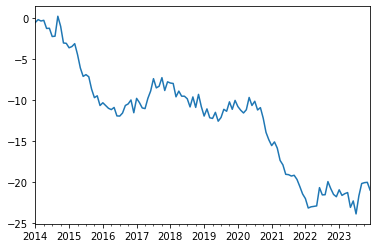

In [43]:
ts.plot()

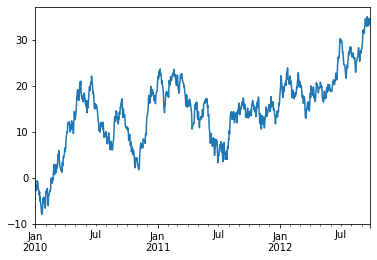

In [44]:
# Another example:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2010',periods=1000))
ts = ts.cumsum()
ts.plot()

---

## 3. Dataset Manipulation

### 3.1 Combining Datasets






1. **`pd.concat([Q1,Q2], ignore_index=, join= , axis=0)`** : (default) **아래**로 붙이기( = `x.append(y)` 결과동일)
    - `ignore_index = True`: 순서대로 붙이기.  index 재정렬
    - `join='inner'`: 공통으로 가지고 있는 열만 아래로 붙임
    - `axis = 1`: 옆으로 붙이기(--> 그냥 `merge`써라   cf. `axis=0` (default) 아래로 붙이기 
    - multi index로 붙이기 : `pd.concat([x,y], keys=['x','y']`



2. **`pd.merge([Q1,Q2], on=, how=)`** : 
    -  `on='b'` : 'b'열을 기준으로 옆으로 붙이기
    - 모든 가능한 콤비네이션으로 붙임/**데이터 loss가 없도록**
    - 같은 이름의 변수가 있을경우 e.g. `b`--> `b_x`, `b_y`
    - 공통되는 열의 이름이 다를 경우 : `left_on = `, '`right_on = `--> 둘 중 하나(열) 제거 `drop('e', axis = 1)`
    - `how`: **inner(교집합), outer(합집합), left(왼쪽에 있는걸 기준으로 해라)**
    





In [66]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [67]:
x_mat = np.arange(1,7).reshape(3,2)
y_mat = 10*x_mat
x = pd.DataFrame(x_mat,columns=list('AB'),index=[1,2,3])
y = pd.DataFrame(y_mat,columns=list('AB'),index=[2,3,4])
print(x)
print(y)

   A  B
1  1  2
2  3  4
3  5  6
    A   B
2  10  20
3  30  40
4  50  60


In [68]:
pd.concat([x,y],axis=0)

,A,B
1,1,2
2,3,4
3,5,6
2,10,20
3,30,40
4,50,60


In [60]:
pd.concat([x,y],ignore_index=True)

,A,B
0,1,2
1,3,4
2,5,6
3,10,20
4,30,40
5,50,60


In [61]:
pd.concat([x,y],axis=1)

,A,B,A,B
1,1.0,2.0,NaN,NaN
2,3.0,4.0,10.0,20.0
3,5.0,6.0,30.0,40.0
4,NaN,NaN,50.0,60.0


In [55]:
# The append() method
x.append(y)

,A,B
1,1,2
2,3,4
3,5,6
2,10,20
3,30,40
4,50,60


In [62]:
x_mat = np.arange(1,7).reshape(3,2)
y_mat = 10*x_mat
x = pd.DataFrame(x_mat,columns=list('AB'))
y = pd.DataFrame(y_mat,columns=list('AB'))
x.index = y.index = [1,2,3]
print(x)
print(y)

   A  B
1  1  2
2  3  4
3  5  6
    A   B
1  10  20
2  30  40
3  50  60


In [63]:
pd.concat([x,y], keys=['x','y'])

A   B
x 1   1   2
  2   3   4
  3   5   6
y 1  10  20
  2  30  40
  3  50  60

### 3.2 Pivot Tables 

We have seen how the ``GroupBy`` abstraction lets us explore relationships within a dataset.
A *pivot table* is a similar operation that is commonly seen in spreadsheets and other programs that operate on tabular data.
The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.

```
pivot_table(
    values=None(aggregation 할 값),
    index=None(row 뭘로 할까),
    columns=None(column 뭘로 할까),
    aggfunc='mean'(어떻게 aggreagation 할까),
    fill_value=None,
    margins=False,
    dropna=True,
    margins_name='All',
    observed=False,
)
Docstring:
Create a spreadsheet-style pivot table as a DataFrame. The levels in
the pivot table will be stored in MultiIndex objects (hierarchical
indexes)
```

In [26]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [27]:
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [28]:
# Group by class and gender, select survival, apply a mean aggregate, 
# combine the resulting groups, and then unstack the hierarchical index 
# to reveal the hidden multidimensionality
titanic.groupby(['sex','class'])['survived'].aggregate('mean').unstack()
## titanic.groupby(['sex', 'class'])['survived'].mean().unstack() : 같은 결과

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [96]:
# Here is the equivalent to the preceding operation using the ``pivot_table`` method:
titanic.pivot_table('survived',index='sex',columns='class')
# titanic.pivot_table('survived','sex','class')  # same results

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [32]:
age = pd.cut(titanic['age'],[0,18,80])
titanic.pivot_table('survived',['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [33]:
titanic.pivot_table(index='sex',columns='class',
                    aggfunc={'fare':'median','survived':'sum'})

fare                survived             
class      First Second   Third    First Second Third
sex                                                  
female  82.66455   22.0  12.475       91     70    72
male    41.26250   13.0   7.925       45     17    47

### 3.3 long table, wide table
* 열정보를 새로운 행 정보로 바꾸기 "MultiIndex"
- `P`--> `P.stack()`--> `P.stack().unstack()`;(되돌리기)
- (2,3) --> (6,) --> (2,3)

In [41]:
P=pd.DataFrame(np.arange(6).reshape(2, 3),index=list('ab'),columns=list('123'))  #새로운 data의 설정
print(P)

   1  2  3
a  0  1  2
b  3  4  5


In [42]:
print(P.stack()) #행 index와 열 index를 만들어 자료를 재정리

a  1    0
   2    1
   3    2
b  1    3
   2    4
   3    5
dtype: int64


In [41]:
print(P.stack().unstack())  #위 과정의 반대방향.

   1  2  3
a  0  1  2
b  3  4  5


In [51]:
P.stack().unstack().shape

(2, 3)